# USA unlikely to medal

## scaling no improvement

## Grid search used 

## Feature importnace had no effect
## k-folds cv¶

['xingyu lan', 'yang liu', 'eleftherios petrounias', 'hao you',
       'jingyuan zou']

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
# from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, fbeta_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier
import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../../Combine_Data/men/sr_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_sr.csv')
srnames = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_srnames.csv')
srolymp = pd.read_csv('../../Data/cleandata22-23/men22_23.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         495 non-null    int64  
 1   D            495 non-null    float64
 2   E            495 non-null    float64
 3   ND           495 non-null    float64
 4   Total        495 non-null    float64
 5   year         495 non-null    float64
 6   medal        495 non-null    int64  
 7   Name         495 non-null    int64  
 8   Nation       495 non-null    int64  
 9   round_final  495 non-null    int64  
 10  round_qual   495 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 42.7 KB


In [5]:
olymp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             2319 non-null   float64
 1   D Score          2319 non-null   float64
 2   E Score          2319 non-null   float64
 3   Pen.             2319 non-null   float64
 4   Total            2319 non-null   float64
 5   year             2319 non-null   int64  
 6   Name             2319 non-null   int64  
 7   nation           2319 non-null   int64  
 8   round_AAfinal    2319 non-null   bool   
 9   round_TeamFinal  2319 non-null   bool   
 10  round_TeamQual   2319 non-null   bool   
 11  round_final      2319 non-null   bool   
 12  round_qual       2319 non-null   bool   
dtypes: bool(5), float64(5), int64(3)
memory usage: 156.4 KB


In [6]:
df['year'].fillna(2023, inplace=True)

# Base line using ZeroR

In [7]:

X = df.drop(columns=['medal'])  
y = df['medal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)

# Initialize  ZeroR classifier
zero_r_clf = DummyClassifier(strategy='most_frequent', random_state=42)

zero_r_clf.fit(X_train, y_train)

# Make predictions on  test data
y_pred = zero_r_clf.predict(X_test)

# Evaluate  model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ZeroR Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


ZeroR Classifier
Accuracy: 0.9878
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       162
           1       0.00      0.00      0.00         2

    accuracy                           0.99       164
   macro avg       0.49      0.50      0.50       164
weighted avg       0.98      0.99      0.98       164

Confusion Matrix:
[[162   0]
 [  2   0]]


# Model Comparison


In [8]:
y = df['medal']
X = df.drop(columns=['medal'])

# CHANGED RANDOM STATE TO HAVE A LARGER NUMBER OF VALUES IN TEST DF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }

for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest
Accuracy: 0.9919
F2-Score: 0.9091
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       122
           1       0.67      1.00      0.80         2

    accuracy                           0.99       124
   macro avg       0.83      1.00      0.90       124
weighted avg       0.99      0.99      0.99       124

Confusion Matrix:
[[121   1]
 [  0   2]]

Classifier: AdaBoost
Accuracy: 0.9919
F2-Score: 0.9091
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       122
           1       0.67      1.00      0.80         2

    accuracy                           0.99       124
   macro avg       0.83      1.00      0.90       124
weighted avg       0.99      0.99      0.99       124

Confusion Matrix:
[[121   1]
 [  0   2]]

Classifier: SVM
Accuracy: 0.9839
F2-Score: 0.0000
Classification Report:
              precision    r

In [9]:
olymp.rename(columns={'D Score': 'D', 'E Score': 'E',
                     'Pen.': 'ND', 'nation': 'Nation'}, inplace=True)

In [10]:
olymp=olymp.drop(columns=['round_TeamFinal', 'round_AAfinal', 'round_TeamQual'])

# Feature Importance

Feature Importances:
Rank: 0.1632
D: 0.1811
E: 0.1501
ND: 0.0000
Total: 0.2842
year: 0.0094
Name: 0.1030
Nation: 0.0829
round_final: 0.0146
round_qual: 0.0115
Accuracy (Top 3): 0.9919
RandomForest Classifier
Accuracy: 0.9919
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       122
           1       0.67      1.00      0.80         2

    accuracy                           0.99       124
   macro avg       0.83      1.00      0.90       124
weighted avg       0.99      0.99      0.99       124

Confusion Matrix:
[[121   1]
 [  0   2]]


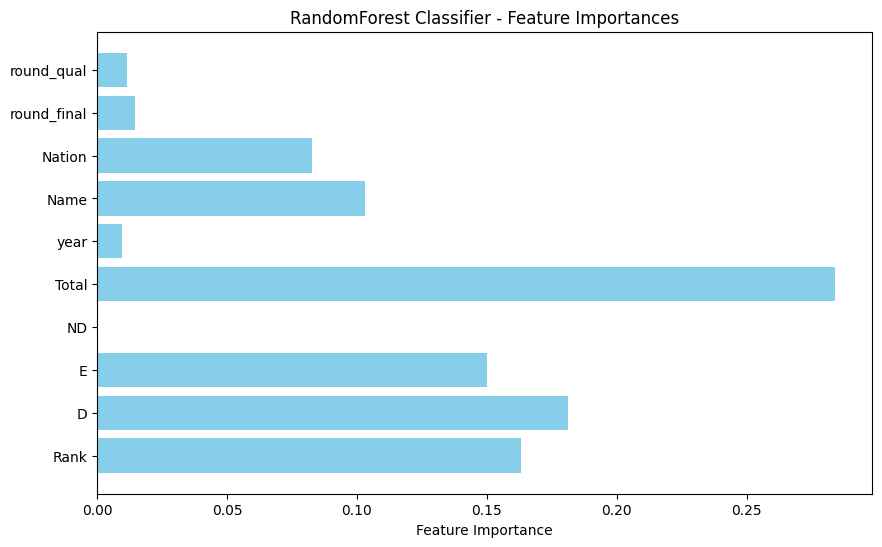

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances from the trained RandomForestClassifier
feature_importances = rf_model.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Make predictions with class probabilities
class_probs = rf_model.predict_proba(X_test)

# Define the number of top classes to select
top_n = 3

# Select the top N classes based on class probabilities
top_n_classes = np.argsort(class_probs, axis=1)[:, -top_n:]

# Set the minimum probability threshold
min_probability_threshold = 0.02

# Apply the threshold to select the top N classes
top_n_classes = top_n_classes[class_probs[np.arange(len(class_probs)), top_n_classes[:, -1]] >= min_probability_threshold]

# Evaluate the model's accuracy using the top N results
y_pred = top_n_classes[:, -1]  # Select the top prediction from the top N
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy (Top {top_n}): {accuracy:.4f}")

# Convert class labels to strings in y_test and y_pred
y_test_str = y_test.astype(str)
y_pred_str = y_pred.astype(str)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("RandomForest Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('RandomForest Classifier - Feature Importances')
plt.show()


# Modeling

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

y = df['medal']
X = df.drop(columns=['medal'])

# Convert class labels to strings
class_names = df['medal'].astype(str).unique()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=110)

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with class probabilities
class_probs = rf_model.predict_proba(X_test)

# Define the number of top classes to select
top_n = 3

# Select the top N classes based on class probabilities
top_n_classes = np.argsort(class_probs, axis=1)[:, -top_n:]

# Set the minimum probability threshold
min_probability_threshold = 0.02

# Apply the threshold to select the top N classes
top_n_classes = top_n_classes[class_probs[np.arange(len(class_probs)), top_n_classes[:, -1]] >= min_probability_threshold]

# Evaluate the model's accuracy using the top N results
y_pred = top_n_classes[:, -1]  # Select the top prediction from the top N
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy (Top {top_n}): {accuracy:.4f}")

# Convert class labels to strings in y_test and y_pred
y_test_str = y_test.astype(str)
y_pred_str = y_pred.astype(str)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy (Top 3): 0.9928
AdaBoost Classifier
Accuracy: 0.9928
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       137
           1       0.67      1.00      0.80         2

    accuracy                           0.99       139
   macro avg       0.83      1.00      0.90       139
weighted avg       1.00      0.99      0.99       139

Confusion Matrix:
[[136   1]
 [  0   2]]


## k-folds cv

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

y = df['medal']
X = df.drop(columns=['medal'])

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize StratifiedKFold for k-fold cross-validation
k_folds = 5
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize variables to store results
accuracies = []

# Iterate over folds for evaluation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    print(f"\nFold {fold + 1}")

    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the RandomForest model for this fold
    rf_model.fit(X_train, y_train)

    # Make predictions on the test data for this fold
    y_pred = rf_model.predict(X_test)

    # Evaluate the model's accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Accuracy: {accuracy:.4f}")

# Calculate and print the average accuracy across folds
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy across Folds: {average_accuracy:.4f}")

# Optionally, you can use the entire dataset to train the final model
# rf_model.fit(X, y)

# Make predictions on the entire dataset
y_pred = rf_model.predict(X)

# Evaluate the model's performance on the entire dataset
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

# Print the results for the entire dataset
print("\nRandomForest Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")



Fold 1
Accuracy: 0.9899

Fold 2
Accuracy: 0.9899

Fold 3
Accuracy: 1.0000

Fold 4
Accuracy: 0.9899

Fold 5
Accuracy: 0.9798

Average Accuracy across Folds: 0.9899

RandomForest Classifier
Accuracy: 0.9960
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       0.88      0.88      0.88         8

    accuracy                           1.00       495
   macro avg       0.94      0.94      0.94       495
weighted avg       1.00      1.00      1.00       495

Confusion Matrix:
[[486   1]
 [  1   7]]


In [14]:
class_probs = rf_model.predict_proba(olymp)

# Define the number of top classes to select
top_n = 20

# Select the top N classes based on class probabilities
top_n_classes = np.argsort(class_probs, axis=1)[:, -top_n:]

# Set the minimum probability threshold
min_probability_threshold = 0.1

# Apply the threshold to select the top N classes
top_n_classes = top_n_classes[class_probs[np.arange(len(class_probs)), top_n_classes[:, -1]] >= min_probability_threshold]

# Evaluate the model's accuracy using the top N results
y_pred = top_n_classes[:, -1] 

# Model Trained earlier, now using 2023/2022 data

In [15]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds


In [16]:
olymp['ypred'].value_counts()

0    2303
1      16
Name: ypred, dtype: int64

In [17]:
filtered_df = olymp[olymp['ypred'] == 1]

In [18]:
filtered_df['Name'].unique()

array([ 10, 731, 732, 198, 336])

# srnames used to match encoded names with actual names

In [19]:
# name_encoded_values = [ 10, 731, 732, 336]
name_encoded_values =[ 10, 731, 732, 198, 336]
# Filter the DataFrame to get the corresponding "Name" values
result = srnames.loc[srnames['Name_encoded'].isin(name_encoded_values), 'Name']


In [20]:
result.unique()

array(['adem asil', 'xingyu lan', 'yang liu', 'eleftherios petrounias',
       'jingyuan zou'], dtype=object)

# srolymp used to get country info from name list above

In [21]:
srolymp["Name"]=srolymp["Name"].str.lower()


In [22]:
names_to_filter = ['adem asil', 'xingyu lan', 'yang liu', 'eleftherios petrounias',
       'jingyuan zou']

# Filter the DataFrame to get rows with the specified "Name" values
result = srolymp[srolymp['Name'].isin(names_to_filter)]

In [23]:
result['Country'].value_counts()

TUR    121
CHN     48
GRE      9
Name: Country, dtype: int64